## Numpy

#### 🔬 **Numpy**（Numerical Python）是一个开源的**高性能科学计算库**，核心是`ndarray`（N-dimensional array）多维数组对象。它提供：
1. **高效存储**：连续内存块存储同质数据，避免Python列表的类型检查开销
2. **向量化操作**：通过预编译C代码实现SIMD（单指令多数据）并行计算
3. **广播机制**：智能处理不同形状数组的运算
4. **数学工具**：线性代数、傅里叶变换、随机数生成等数学函数
5. **硬件加速**：利用CPU缓存局部性和SSE/AVX指令集优化

#### 💡 为什么需要Numpy？
1. **性能需求**：处理100万数据点时，Numpy比纯Python快**50倍以上**
2. **科学计算**：支撑Pandas、Scikit-learn、TensorFlow等AI/数据科学生态
3. **维度操作**：轻松处理3D医学影像、4D气象数据等高维数据
4. **代码简洁**：用一行向量化操作替代多层循环

> ✅ **简单说**：当你要处理**超过1万行的Excel数据**、**人工智能模型训练**或**科学实验数据**时，Numpy就是你的"计算加速器"和"数据变形金刚"。

In [8]:
#导包
import numpy as np

### **一、Numpy基础**
1. **创建数组**


![](./img/矩阵.png) 

- `ndarray` 多维数组结构,创建一个 ndarray 只需调用 NumPy 的 array 函数即可：

In [9]:
#numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)

arr11=np.array([1,2,3,4])
arr12=np.array([[1,2,3,4],[10,20,30,40]])
arr13=np.array([[[1,4,7],[2,9,7],[1,3,0],[9,6,9]],[[1,4,7],[2,9,7],[1,3,0],[9,6,9]]])
print("一维数组：\n",arr11)
print("二维数组：\n",arr12)
print("三维数组：\n",arr13)

一维数组：
 [1 2 3 4]
二维数组：
 [[ 1  2  3  4]
 [10 20 30 40]]
三维数组：
 [[[1 4 7]
  [2 9 7]
  [1 3 0]
  [9 6 9]]

 [[1 4 7]
  [2 9 7]
  [1 3 0]
  [9 6 9]]]


- 1.1 数组元素全部是整数，NumPy 会自动推断其数据类型为 int（具体可能是 int64 或 int32，取决于环境默认设置 ）

In [10]:
arr1 =np.array([1,2,89,67,23,6,19,78])
arr1

array([ 1,  2, 89, 67, 23,  6, 19, 78])

In [11]:
arr1.dtype

dtype('int32')

- 1.2 数组元素 [1, 2, 89, 67, 23.5, 6, 19, 78] 中包含浮点数 23.5，NumPy 会统一将数组数据类型推断为 float（ 通常是 float64 ）。

In [12]:
arr2 =np.array([1,2,89,67,23.5,6,19,78])
arr2

array([ 1. ,  2. , 89. , 67. , 23.5,  6. , 19. , 78. ])

In [13]:
arr2.dtype

dtype('float64')

- 1.3 混合数据类型的 NumPy 数组，由于数组中同时包含整数（如 1, 2） 和字符串（"abc"），NumPy 无法将其统一为数值或浮点数类型，会自动将整个数组的数据类型推断为 '<U' 或 'object'：
    - 多数情况下会是 Unicode 字符串类型（如 dtype('<U21')），其中 U 表示 Unicode，数字表示可容纳的最大字符长度。
    - 少数情况下（取决于 NumPy 版本和环境）会是 object 类型（dtype('O')），即数组存储的是 Python 对象的引用。
    - 打印数组时，所有元素都会以字符串形式显示（即使原是数字）
    - 混合数组，这体现了 NumPy 数组 **“同质性”**（所有元素必须是同一类型）的特性 —— 当元素类型不统一时，会自动向上转换为兼容所有元素的 “通用类型”（此处为字符串）。但这种混合数组失去了 NumPy 对数值计算的优化能力，通常仅用于临时存储或格式转换场景，实际数据分析中应尽量避免使用。

In [14]:
arr3 =np.array([1,2,89,67,23,6,19,78,"abc"])
arr3

array(['1', '2', '89', '67', '23', '6', '19', '78', 'abc'], dtype='<U11')

2. 特殊数组

In [15]:
# arr14=np.zeros(3)  #一维数组
# arr14=np.zeros((3,3)) #二维数组
arr14=np.zeros((3,3,3)) #三维数组
arr14

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [16]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [17]:
np.empty((2,2)) # 创建一个空的矩阵

array([[2.12199579e-314, 6.95187041e-310],
       [8.53745436e-321, 6.15387069e-312]])

In [18]:
np.arange(0, 10, 0.5) # 创建一个从0到10的数组，步长为0.5

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [19]:
# 线性关系数组，函数会在 [0, 1] 区间内均匀生成 5 个数值，包括 0 和 1
np.linspace(0, 1, 5)  

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [20]:
np.random.random((10,2))

array([[0.9966958 , 0.4537608 ],
       [0.86479504, 0.82711155],
       [0.56138075, 0.98044548],
       [0.21630644, 0.82540037],
       [0.02537848, 0.18490476],
       [0.43589774, 0.74778279],
       [0.42881304, 0.1193716 ],
       [0.19710825, 0.07347605],
       [0.45959253, 0.61755449],
       [0.25334636, 0.01229119]])

In [21]:
# 特殊矩阵
print(np.eye(3))      # 单位矩阵
print(np.diag([1,2,3])) # 对角矩阵
print(np.full((2,2), 7)) # 填充矩阵

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[7 7]
 [7 7]]


![](./img/创建数组.png)

在 NumPy 里，随机数组是借助其 random 模块生成的、元素值随机分布的数组，广泛用于模拟、抽样、初始化模型参数等场景。下面从基础概念、常见用法、不同分布类型展开介绍：

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 用于美化直方图

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

一、常见生成方法

1. 均匀分布随机数组（rand 系列）

- **np.random.rand(d0, d1, ..., dn)**

- 生成0 到 1 之间的均匀分布随机数数组，参数 d0, d1,... 是各维度大小。


In [23]:
# 生成 2 行 3 列的均匀分布随机数组
Arr1 = np.random.rand(2, 3)
Arr1  

array([[0.97118399, 0.45974617, 0.79486871],
       [0.73618263, 0.00494506, 0.52777367]])

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

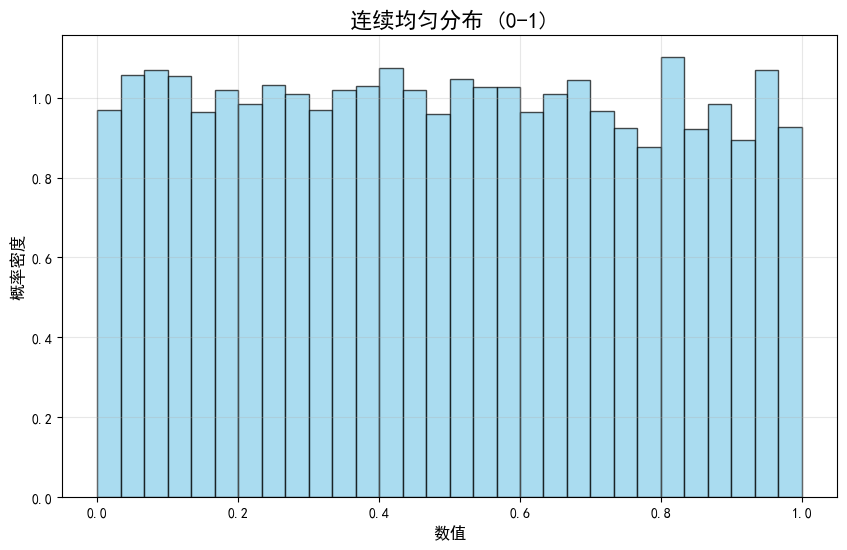

In [24]:
# 生成连续均匀分布随机数组 (0-1之间)
np.random.seed(42)
uniform_arr = np.random.rand(10000)

# 可视化
plt.figure(figsize=(10, 6))
plt.hist(uniform_arr, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('连续均匀分布 (0-1)', fontsize=16)
plt.xlabel('数值', fontsize=12)
plt.ylabel('概率密度', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

- **np.random.randint(low, high=None, size=None, dtype=int)**

- 生成整数型均匀分布随机数数组，low 是最小值（包含），high 是最大值（不包含，若不填则从 0 开始），size 控制数组形状。

In [25]:
# 生成 1 维、元素在 [0, 10) 的随机整数数组，长度为 5
Arr5 = np.random.randint(0, 10, size=5)  
Arr5

array([6, 3, 1, 4, 2])

C:\Users\Man\AppData\Local\Temp\ipykernel_16804\621777136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=uniform_int_arr, palette='pastel')
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfon

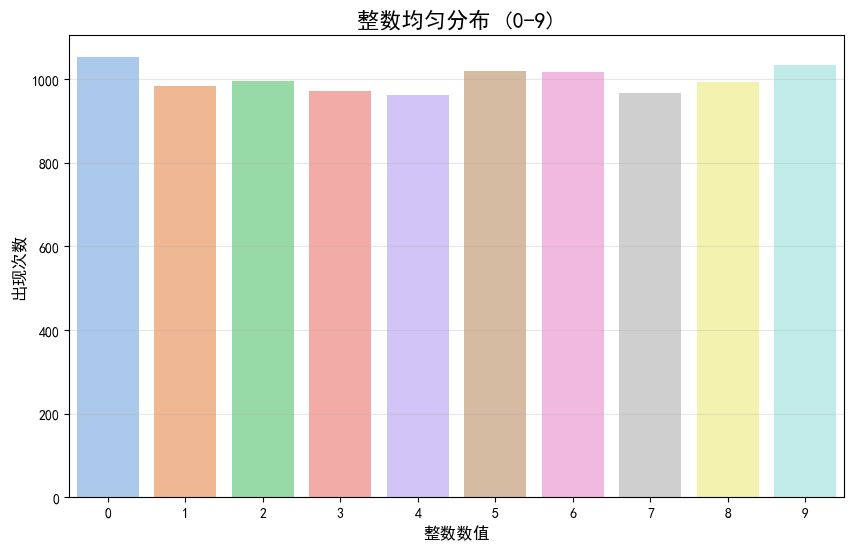

In [26]:
# 生成整数均匀分布随机数组 (0-9之间)
np.random.seed(42)
uniform_int_arr = np.random.randint(0, 10, size=10000)

# 可视化
plt.figure(figsize=(10, 6))
sns.countplot(x=uniform_int_arr, palette='pastel')
plt.title('整数均匀分布 (0-9)', fontsize=16)
plt.xlabel('整数数值', fontsize=12)
plt.ylabel('出现次数', fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.show()

2. 正态分布随机数组（randn 系列）
- **np.random.randn(d0, d1, ..., dn)**
- 生成标准正态分布（均值 0，标准差 1）的随机数数组，参数是维度。

In [27]:
# 生成 3 行 2 列的标准正态分布数组
Arr6 = np.random.randn(3, 2)  
Arr6


array([[-1.20919871,  0.05674168],
       [ 0.11345604,  0.18583763],
       [ 0.91987152,  1.01892324]])

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

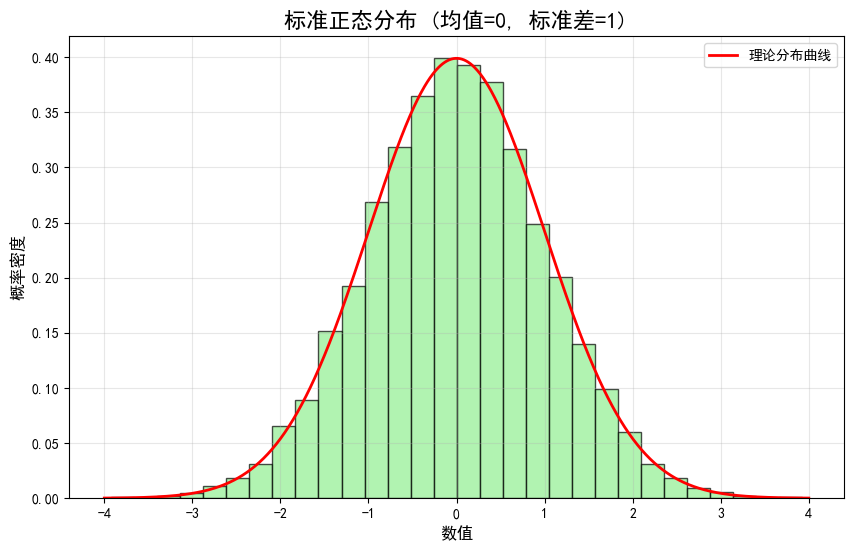

In [28]:
# 生成标准正态分布随机数组 (均值=0, 标准差=1)
np.random.seed(42)
normal_std_arr = np.random.randn(10000)

# 可视化
plt.figure(figsize=(10, 6))
plt.hist(normal_std_arr, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black')

# 添加理论正态分布曲线
x = np.linspace(-4, 4, 1000)
plt.plot(x, 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2), 'r-', lw=2, label='理论分布曲线')

plt.title('标准正态分布 (均值=0, 标准差=1)', fontsize=16)
plt.xlabel('数值', fontsize=12)
plt.ylabel('概率密度', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- **np.random.normal(loc=0.0, scale=1.0, size=None)**
- 更灵活的正态分布生成，loc 是均值，scale 是标准差，size 是数组形状。

In [29]:
# 生成均值为 5、标准差为 2 的 1 维数组，长度 4
Arr7 = np.random.normal(5, 2, size=4)  
Arr7

array([3.64301054, 4.38900107, 3.80523788, 5.22083609])

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

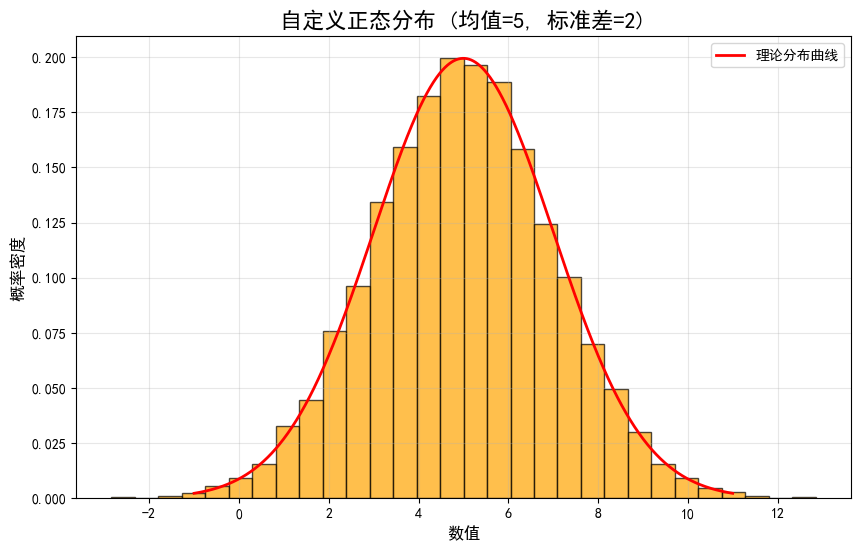

In [30]:
# 生成自定义正态分布随机数组 (均值=5, 标准差=2)
np.random.seed(42)
normal_arr = np.random.normal(loc=5, scale=2, size=10000)

# 可视化
plt.figure(figsize=(10, 6))
plt.hist(normal_arr, bins=30, density=True, alpha=0.7, color='orange', edgecolor='black')

# 添加理论正态分布曲线
x = np.linspace(5-3*2, 5+3*2, 1000)
plt.plot(x, 1/(np.sqrt(2*np.pi*2**2))*np.exp(-(x-5)**2/(2*2**2)), 'r-', lw=2, label='理论分布曲线')

plt.title('自定义正态分布 (均值=5, 标准差=2)', fontsize=16)
plt.xlabel('数值', fontsize=12)
plt.ylabel('概率密度', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

二、随机种子（seed）
- 为了让随机数组可复现（每次生成相同结果），可设置随机种子：

In [31]:
np.random.seed(42)  # 固定种子值（如 42）
Arr8 = np.random.rand(3)  
Arr8

array([0.37454012, 0.95071431, 0.73199394])

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

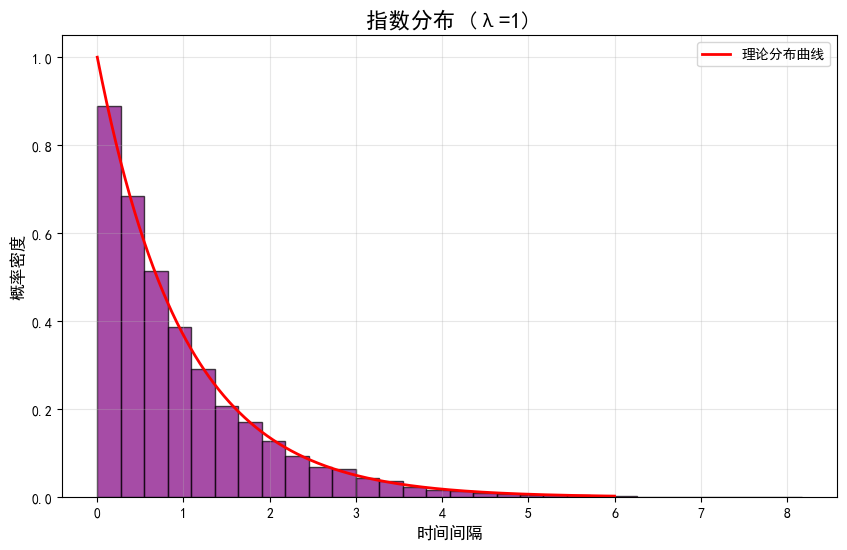

In [32]:
# 生成指数分布随机数组 (λ=1)
np.random.seed(42)
exponential_arr = np.random.exponential(scale=1, size=10000)

# 可视化
plt.figure(figsize=(10, 6))
plt.hist(exponential_arr, bins=30, density=True, alpha=0.7, color='purple', edgecolor='black')

# 添加理论指数分布曲线
x = np.linspace(0, 6, 1000)
plt.plot(x, np.exp(-x), 'r-', lw=2, label='理论分布曲线')

plt.title('指数分布 (λ=1)', fontsize=16)
plt.xlabel('时间间隔', fontsize=12)
plt.ylabel('概率密度', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**数组属性与方法**

   - 数组属性：`ndim`, `shape`, `size`, `dtype`, `itemsize`

![](./img/数组属性.png) 

In [33]:
#数组对象的属性
import numpy as np
# arr15 = np.array([1,3,6,7,2])
# arr15 = np.array([[1,1],
#                 [2,2],
#                 [3,3]])
arr15 = np.array([[[2,2],[2,2],[3.1,3]],
                  [[4,4],[5,5],[6,6]],
                  [[7,7],[8,8],[9,9]]])
print('数组的元素：',arr15)
print('数组的维度：',arr15.ndim) 
print('数组的形状：',arr15.shape)
print('数组的元素数量：',arr15.size)
print('数组的元素数据类型：',arr15.dtype)
print('数组的字节长度：',arr15.itemsize)

数组的元素： [[[2.  2. ]
  [2.  2. ]
  [3.1 3. ]]

 [[4.  4. ]
  [5.  5. ]
  [6.  6. ]]

 [[7.  7. ]
  [8.  8. ]
  [9.  9. ]]]
数组的维度： 3
数组的形状： (3, 3, 2)
数组的元素数量： 18
数组的元素数据类型： float64
数组的字节长度： 8


   - 数据类型：`int32`, `float64`, `bool_`, 类型转换 `astype()`

In [34]:
arr16=np.array([1, 2, 3], dtype=np.float64)
arr16.dtype

dtype('float64')

In [35]:
arr17=np.array([1, 2, 3], dtype='i')
arr17.dtype

dtype('int32')

In [36]:
arr18=arr17.astype('f')
arr18.dtype

dtype('float32')

---

### **二、数组操作**
1. **索引与切片**
   - 基础索引：`arr[1, 2]`, `arr[0:5, :]`
   - 高级索引：
     - 布尔索引：`arr[arr > 0]`
     - 整数数组索引：`arr[[0, 2, 4]]`



In [37]:
import numpy as np

# 一维数组
arr_1d = np.array([1, 2, 3])  
# 二维数组（对应图中 data 结构）
arr_2d = np.array([[1, 2],  
                   [3, 4],  
                   [5, 6]])  

![](./img/普通索引.png)

In [38]:
# 取索引 1 的元素
print(arr_1d[1])  

# 取索引 0 到 4（不包含 5）的切片
print(arr_1d[0:4])  

# 从索引 1 开始取到末尾
print(arr_1d[1:])  

2
[1 2 3]
[2 3]


![](./img/矩阵索引.png)

In [39]:
# 取第 1 行（索引0）
arr_2d[0]

array([1, 2])

In [40]:
# 取第 0-1 行（不包含 2）、所有列 
arr_2d[0:2, :]

array([[1, 2],
       [3, 4]])

In [41]:
# 取第 1 列（索引 1）
arr_2d[:, 1]

array([2, 4, 6])

In [42]:
# 取第 0 行、第 1 列元素 
arr_2d[0, 1]

2

In [43]:
# 取第 1-2 行（不包含 3）、所有列
arr_2d[1:3, :] 

array([[3, 4],
       [5, 6]])

In [44]:
# 取第 0-1 行（不包含 2）、第 0 列
arr_2d[0:2, 0]

array([1, 3])

   - 视图 vs 副本：`arr.view()`, `arr.copy()`

![](./img/视图与拷贝.png)

In [45]:
# 1. 直接赋值（无拷贝，共享引用）

arr21 = np.array([1, 2, 3])

arr_ref = arr21  # 直接赋值，无拷贝
arr_ref[0] = 100  # 修改 arr_ref，arr 也会变

print("直接赋值后 arr21：", arr21)  # 输出 [100, 2, 3]

直接赋值后 arr21： [100   2   3]


In [46]:
# 2. view（浅拷贝/视图，共享数据）

arr22 = np.array([[1, 2], [3, 4]])

arr_view = arr22.view()  # 创建视图
arr_view[0, 0] = 100  # 修改视图，原数组 arr 会变
# 同时，改变形状不影响原数组的形状，但数据仍共享
arr_view.shape = (4,)  

print("view 修改后 arr22：\n", arr22)

view 修改后 arr22：
 [[100   2]
 [  3   4]]


In [47]:
# 3. copy（深拷贝，完全独立）

arr23 = np.array([[1, 2], [3, 4]])
arr_copy = arr23.copy()  # 深拷贝
arr_copy[0, 0] = 100  # 修改拷贝数组，原数组 arr 不变

print("copy 修改后 arr23：\n", arr23) 

copy 修改后 arr23：
 [[1 2]
 [3 4]]


   - 切分 vs 合并：

![](img/切分合并.png)

In [48]:
import numpy as np

# 1. 准备基础数组
arr24 = np.arange(12).reshape(3, 4)  # 3行4列：[[0,1,2,3],[4,5,6,7],[8,9,10,11]]
arr25 = np.arange(12, 24).reshape(3, 4)  # 另一组3行4列：[[12,13,14,15],...]
print("数组arr24:\n",arr24)
print("数组arr25:\n",arr25)

数组arr24:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
数组arr25:
 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [49]:
# 2. 合并操作
## hstack：水平合并（列方向拼接，要求行数一致）
hstack_res = np.hstack([arr24, arr25])  
# 结果：3行8列 → [[0,1,2,3,12,13,14,15], ...]

## vstack：垂直合并（行方向拼接，要求列数一致）
vstack_res = np.vstack([arr24, arr25])  
# 结果：6行4列 → [[0,1,2,3], [4,5,6,7], ..., [20,21,22,23]]

## stack：通用合并（新增维度拼接，需指定 axis ）
# axis=0：在第0维（行维度外）新增维度 → 结果 shape (2,3,4),2张,每张3行4列
stack_res = np.stack([arr24, arr25], axis=0)  
# axis=1：在第1维（列维度旁）新增维度 → 结果 shape (3,2,4),
stack_res_axis1 = np.stack([arr24, arr25], axis=1)  

print("hstack 结果：\n", hstack_res)
print("vstack 结果：\n", vstack_res)
print("stack(axis=0) 结果：\n", stack_res.shape)

hstack 结果：
 [[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
vstack 结果：
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
stack(axis=0) 结果：
 (2, 3, 4)


In [50]:
# 3. 切分操作
## hsplit：水平切分（按列切分，要求列数能被均分，或指定切分点）
# 切分成 2 份（每份 2 列）→ 结果是包含 2 个数组的列表，每个 shape (3,2)
hsplit_res = np.hsplit(arr24, 2)  

## vsplit：垂直切分（按行切分，要求行数能被均分，或指定切分点）
# 切分成 3 份（每份 1 行）→ 结果是包含 3 个数组的列表，每个 shape (1,4)
vsplit_res = np.vsplit(arr24, 3)  

## split：通用切分（按 axis 指定维度切分，需配合切分点）
# axis=1（列维度），在索引 1、3 处切分 → 分成 3 段，shape 分别为 (3,1),(3,2),(3,1)
split_res = np.split(arr24, [1, 3], axis=1)  

print("hsplit 结果：\n", [x.shape for x in hsplit_res])
print("vsplit 结果：\n", [x.shape for x in vsplit_res])
print("split 结果：\n", [x.shape for x in split_res])

hsplit 结果：
 [(3, 2), (3, 2)]
vsplit 结果：
 [(1, 4), (1, 4), (1, 4)]
split 结果：
 [(3, 1), (3, 2), (3, 1)]


 2. **数组方法**：`delete`, `append`, `insert`,`resize`,`reshape`

1. `delete()`：删除数组指定元素/子数组
- **作用**：从数组的指定维度，删除指定索引位置的元素或子数组，返回新数组（不修改原数组）。  
- **语法**：`np.delete(arr, obj, axis=None)`  
  - `arr`：要操作的数组。  
  - `obj`：要删除的索引（单个索引、索引列表/切片 ）。  
  - `axis`：指定维度（不指定则先展平数组再删除）。  
- **示例**：

In [51]:
import numpy as np
arr26 = np.array([[1, 2], [3, 4], [5, 6]])
# 不指定 axis 时，先展平再删除
res = np.delete(arr26, 1)  
print(res)
# 沿 axis=0（行维度），删除索引 1 的行
res = np.delete(arr26, 1, axis=0)  
print(res)
# 沿 axis=1（列维度），删除索引 0 的列
res_col = np.delete(arr26, 0, axis=1)  
print(res_col)

[1 3 4 5 6]
[[1 2]
 [5 6]]
[[2]
 [4]
 [6]]


2. `append()`：在维度末尾追加元素/数组
- **作用**：在数组指定维度的“末尾”，追加元素或同维度数组，返回新数组（不修改原数组 ）。  
- **语法**：`np.append(arr, values, axis=None)`  
  - `arr`：原数组。  
  - `values`：要追加的内容（需和原数组维度匹配，`axis` 不指定时会展平）。  
  - `axis`：指定维度（需保证 `arr` 和 `values` 在该维度外的形状一致 ）。  
- **示例**：

In [52]:
arr27 = np.array([[1, 2], [3, 4]])
# axis=None（默认）：先展平原数组，追加后再展平
res_flat = np.append(arr27, 5)  
print(res_flat)
# axis=0：沿行维度末尾追加，需保证列数一致 
res_row = np.append(arr27, [[5, 6]], axis=0)  
print(res_row)
# axis=1：沿列维度末尾追加，需保证行数一致 
res_col = np.append(arr27, [[5], [6]], axis=1)  
print(res_col)


[1 2 3 4 5]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]


3. `insert()`：在维度指定位置插入元素/数组
- **作用**：在数组指定维度的**指定索引位置**，插入元素或同维度数组，返回新数组（不修改原数组 ）。  
- **语法**：`np.insert(arr, obj, values, axis=None)`  
  - `obj`：插入的索引位置（单个索引、索引列表 ）。  
  - 其他参数同 `append`，需注意维度匹配（`axis` 指定时，形状要兼容 ）。  
- **示例**：



In [53]:
# axis=None：展平后在索引 1 插入
res_flat = np.insert(arr27, 1, 5) 
print(res_flat) 
# axis=0：沿行维度，在索引 1 插入行
res_row = np.insert(arr27, 1, [[5, 6]], axis=0)  
print(res_row)
# axis=1：沿列维度，在索引 1 插入列
res_col = np.insert(arr27, 1, [5, 6], axis=1)  
print(res_col)

[1 5 2 3 4]
[[1 2]
 [5 6]
 [3 4]]
[[1 5 2]
 [3 6 4]]


4. `reshape()`：改变数组形状
- **作用**：在不改变数据的前提下，调整数组的维度结构（比如 1 维→2 维、2 维→3 维等 ），返回新数组（原数组不变 ）。要求调整前后元素总数一致（行×列×… 相等 ）。  
- **语法**：`arr.reshape(newshape)` ，`newshape` 是新形状（元组，如 `(2,3)` 、`(3,2,2)` ）。  
- **示例**：


In [54]:
arr28 = np.arange(6)  # [0 1 2 3 4 5]
# 改成 2 行 3 列 
res1 = arr28.reshape(2, 3) 
print(res1)

[[0 1 2]
 [3 4 5]]


5. `resize()`：“强制”改变数组形状（支持截断/补值）
- **作用**：类似 `reshape` ，但**原地修改原数组**！若新形状元素数少于原数组，会截断数据；若多于原数组，会用默认值（0 ）补全。  
- **语法**：`arr.resize(newshape, refcheck=True)` ，`newshape` 是新形状，`refcheck` 用于检查引用（一般默认即可 ）。  
- **示例**：

In [55]:
arr29 = np.arange(6)  # [0 1 2 3 4 5]
# 原地改成 2 行 4 列 → 元素不够，补 0 → 结果 [[0 1 2 3],[4 5 0 0]]
arr29.resize((2, 4)) 
arr29

array([[0, 1, 2, 3],
       [4, 5, 0, 0]])

In [56]:
arr29 = np.arange(6)  
res2=arr29.resize((2, 4)) 
print(res2)

None


In [57]:
arr29 = np.arange(6) 
arr29.resize((2, 4)) 
res2=arr29
print(res2)

[[0 1 2 3]
 [4 5 0 0]]


In [58]:
import numpy as np

# 先创建一个数组，这里用 arange 生成 0 到 11 的数组，再 reshape 成 3 行 4 列
arr = np.arange(12).reshape(3, 4)  
print("原始数组：")
print(arr)

# 形状操作
print("\n形状操作：")
# 不改变原数组，返回新形状的数组
print("reshape(4, 3) 结果：", arr.reshape(4, 3))  

# 原地修改数组形状
arr.resize((6, 2))  
print("resize((6,2)) 后数组：")
print(arr)

# 降维，返回副本
print("flatten() 结果：", arr.flatten())  
# 降维，返回视图（修改视图可能影响原数组）
print("ravel() 结果：", arr.ravel())  
# 增加维度，axis=0 表示在第一个维度前新增
arr_expanded = np.expand_dims(arr, axis=0)  
print("expand_dims(axis=0) 结果：")
print(arr_expanded)

原始数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

形状操作：
reshape(4, 3) 结果： [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
resize((6,2)) 后数组：
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
flatten() 结果： [ 0  1  2  3  4  5  6  7  8  9 10 11]
ravel() 结果： [ 0  1  2  3  4  5  6  7  8  9 10 11]
expand_dims(axis=0) 结果：
[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]
  [ 8  9]
  [10 11]]]


6.Numpy数组的搜索方法
- 1.numpy.where(条件，结果1，结果2) 根据条件筛选，只有条件参数时，返回符合要求的数据元素索引列表；有结果参数时，条件成立返回结果1，否则返回结果2。
- 2.numpy.all(条件) 根据条件判断，当所有元素满足条件时返回True，否则返回False
- 3.numpy.any(条件) 根据条件判断，只要有一个元素满足条件时返回True，都不满足时返回False

In [59]:
import numpy as np

arr = np.array([5, 2, 8, 3, 9, 4])

# 布尔索引
# 查找所有大于4的元素
result = arr[arr > 4]
print(result)

# 获取满足条件的索引
indices = np.where(arr > 4)
print(indices)  # 输出: (array([0, 2, 4]),)

# 条件替换
result = np.where(arr > 4, arr, -1)
print(result)  # 输出: [5 -1 8 -1 9 -1]

[5 8 9]
(array([0, 2, 4], dtype=int64),)
[ 5 -1  8 -1  9 -1]


In [ ]:
a = np.array([True, False])
print(np.any(a))
print(np.all(a))
![](./img/数组属性与方法.png)

True
False


'[]' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


简单总结：  
- **数组方法**
  - 增删系列（`delete`/`append`/`insert` ）：操作数组元素/子数组，返回新数组，重点关注 `axis` 和维度匹配。  
  - 形状系列（`reshape`/`resize` ）：调整维度，`reshape` 返回新数组，`resize` 原地改，且 `resize` 支持“截断/补值”灵活处理形状差异。
- **切分/合并**：  
  - `hstack`/`hsplit` 聚焦**水平（列方向）** 操作，`vstack`/`vsplit` 聚焦**垂直（行方向）** 操作；  
  - `stack`/`split` 更灵活，通过 `axis` 控制**新增维度/指定维度** 的拼接/切分，适合复杂需求。  
- **视图与拷贝**：  
  - **直接赋值**：完全共享引用，改一个全变；  
  - **view**：浅拷贝，数据共享（改视图会影响原数组），但形状可独立调整；  
  - **copy**：深拷贝，数据和形状都完全独立，互不影响。  

实际用的时候，根据需求选对应的方法就行～ 比如合并数据用 `hstack`/`vstack` ，需要灵活切分用 `split` ；处理数据独立性时，按需选 `view` （想共享数据省内存）或 `copy` （想完全隔离） 。

---
### **三、运算体系**
1. **向量化运算**
   - 元素级运算：`+`, `-`, `*`, `/`, `**`
   - 比较运算：`>`, `==`, `np.logical_and()`，对数组元素逐个比较，返回布尔值数组；np.logical_and 等是按元素的逻辑运算（与、或、非等 ）。


In [61]:
import numpy as np

arr31 = np.array([1, 2, 7])
arr32 = np.array([4, 2, 6])

# 加法：对应元素相加 → [5 7 9]
print(arr31 + arr32)  
# 乘法：对应元素相乘 → [4 10 18]
print(arr31 * arr32)  
# 幂运算：arr1 元素逐个取 3 次幂 → [ 1  8 27]
print(arr31 ** 3)  

[ 5  4 13]
[ 4  4 42]
[  1   8 343]


In [62]:
# 大于比较：arr1 元素 > arr2 元素
print(arr31 > arr32)  
# 等于比较：arr1 元素 == arr2 元素
print(arr31 == arr32)  
# 逻辑与：arr1 元素 >1 且 arr2 元素 <4 
print(np.logical_and(arr31 > 1, arr32 < 4))  

[False False  True]
[False  True False]
[False  True False]


2. **广播机制（Broadcasting）**
   - 规则：从尾部维度对齐，维度为1可扩展，即把维度小的数组 “广播” 成和维度大的数组形状匹配，再运算。
   - 示例：`(5,3) + (3,) → (5,3)`

![](./img/广播机制.png)

In [63]:
arr33 = np.ones((5, 3))  # 形状 (5,3) 的数组，元素全 1
scalar_like = np.array([1, 2, 3])  # 形状 (3,) ，可看作 (1,3)

# 广播：(5,3) + (1,3) → (5,3) ，每一行都加 [1,2,3]
result = arr33 + scalar_like  #矩阵加向量
print(result)

[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


3. **通用函数（ufunc）**
   | 数学函数      | 统计函数      | 逻辑函数       |
   |---------------|---------------|----------------|
   | `np.sin()`    | `np.sum()`    | `np.any()`     |
   | `np.exp()`    | `np.mean()`   | `np.all()`     |
   | `np.log()`    | `np.std()`    | `np.where()`   |
   | `np.abs()`    | `np.median()` | `np.select()`  |

**数学函数**
- **解释**：对数组元素逐个进行数学运算（正弦、指数、对数、绝对值等 ）。  
- **示例**：

In [64]:
arr34 = np.array([-1, 0, 1])

# 正弦运算
print(np.sin(arr34))  

# 指数运算（e^x）
print(np.exp(arr34)) 

# 绝对值
print(np.abs(arr34))  

[-0.84147098  0.          0.84147098]
[0.36787944 1.         2.71828183]
[1 0 1]


**统计函数**
- **解释**：对数组的统计特征计算（求和、均值、标准差、中位数等 ），可指定维度（如按行、按列统计 ）。  
- **示例**：

In [65]:
arr35 = np.array([[1, 2], [3, 4]])

# 求和
print(np.sum(arr35))  
# 按列求均值
print(np.mean(arr35, axis=0))  
# 标准差 
print(np.std(arr35))  
# 中位数 
print(np.median(arr35))  

10
[2. 3.]
1.118033988749895
2.5


**逻辑函数**
- **解释**：对数组元素进行逻辑判断（是否存在真、是否全为真、按条件定位/选择等 ）。  
- **示例**：

In [66]:
arr36 = np.array([True, False, True])

# 是否有至少一个 True → True
print(np.any(arr36))  
# 是否全为 True → False
print(np.all(arr36))  

arr_num = np.array([1, 2, 3, 4])

# 按条件定位：返回满足 arr_num>2 的索引 → [2 3]
print(np.where(arr_num > 2))  

# 按条件选择：满足 >2 选自身，否则选 0 → [0 0 3 4]
print(np.select([arr_num > 2], [arr_num], default=0))  

True
False
(array([2, 3], dtype=int64),)
[0 0 3 4]


4. **线性代数**
   ```python
   np.dot(A, B)        # 矩阵乘法
   A @ B               # Python3.5+ 操作符
   np.linalg.inv(A)    # 矩阵求逆
   np.linalg.eig(A)    # 特征值分解
   np.linalg.solve(A, b) # 解线性方程组
   ```

---

### **四、应用专题**

#### 1.**二值图像**
- 二值图像是仅包含黑白两种颜色的图像，主要用于图像轮廓、霍夫直线变换、分隔提取等图像处理操作
- 二值图像的保存原理


![](./img/二值图像.png)

2.**灰度图像**
- 灰度图像是采用更多数值体现不同层级黑白颜色的图像，通常采用256个灰度级，用于霍夫圆环变换、分水岭算法等很多图像处理场合
- 灰度图像的原理

![](./img/灰度图像.png)

- 灰度图像的保存格式

![](./img/灰度图像保存格式.png)

3.**彩色图像**
- 由多组不同的颜色构成的图像，具有不同的色彩模式
- 彩色图像的原理（以RGB模式为例）

![](./img/RGB.png)

**核心原理**

```python
arr41 = np.zeros((300,300,3))
```
- 创建一个 300x300 像素的图像
- 第三个维度 `3` 表示 RGB 三个颜色通道：
  - 通道 0：红色 (Red)
  - 通道 1：绿色 (Green)
  - 通道 2：蓝色 (Blue)
- 初始化为全零（黑色）

**RGB 颜色模型说明**
| 颜色 | 红色值 | 绿色值 | 蓝色值 | RGB组合 |
|------|--------|--------|--------|---------|
| 红色 | 255    | 0      | 0      | (255,0,0) |
| 绿色 | 0      | 255    | 0      | (0,255,0) |
| 蓝色 | 0      | 0      | 255    | (0,0,255) |
| 黄色 | 255    | 255    | 0      | (255,255,0) |
| 白色 | 255    | 255    | 255    | (255,255,255) |
| 黑色 | 0      | 0      | 0      | (0,0,0) |

1. **图像处理**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

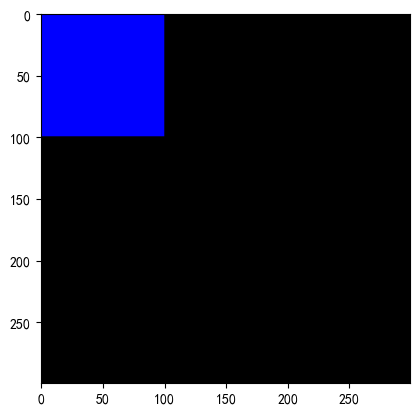

In [67]:
#numpy的色彩应用
import matplotlib.pyplot as plt
arr41 = np.zeros((300,300,3)) #前两个维度体现图片的宽高，第三个维度表示颜色
# arr41[0:100,0:100,0] = 255  # 纯红色 (255,0,0)
# arr41[0:100,0:100,1] = 255  # 纯绿色 (0,255,0)
# arr41[0:100,0:100,0:2] = 255  # 黄色 (255,255,0)
arr41[0:100,0:100,2] = 255
plt.grid(False)  
plt.imshow(arr41)

**扩展应用**
- 可以创建更复杂的颜色模式:

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

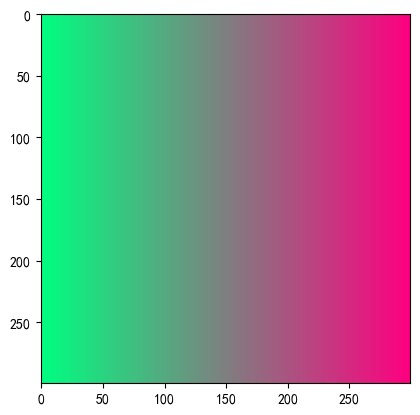

In [68]:
# 创建彩色条纹
arr = np.zeros((300,300,3))
arr[:,:,0] = np.linspace(0,255,300)  # 红色通道渐变
arr[:,:,1] = np.linspace(255,0,300)  # 绿色通道渐变
arr[:,:,2] = 128  # 蓝色通道固定值

plt.imshow(arr.astype(np.uint8))
plt.show()

- 这种使用 NumPy 数组表示图像的方法广泛应用于：
1. 计算机视觉处理
2. 图像生成和编辑
3. 数据可视化
4. 机器学习中的图像处理

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

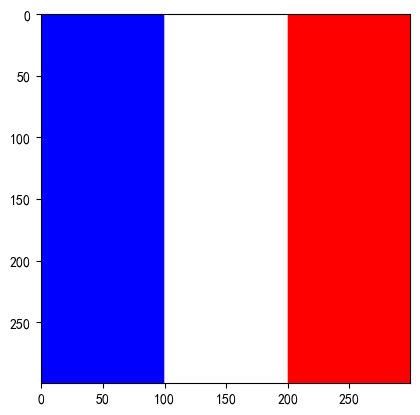

In [69]:
#绘制国旗练习
import matplotlib.pyplot as plt
arr42 = np.zeros((300,300,3))
arr42[0:300,0:100,2] = 255
arr42[0:300,100:200,:] = 255
arr42[0:300,200:300,0] = 255
plt.grid(False)  
plt.imshow(arr42)

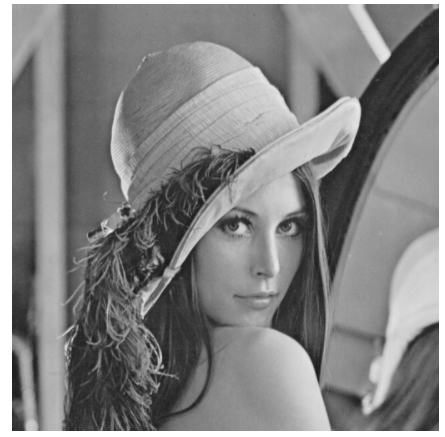

shape: (437, 445, 3)


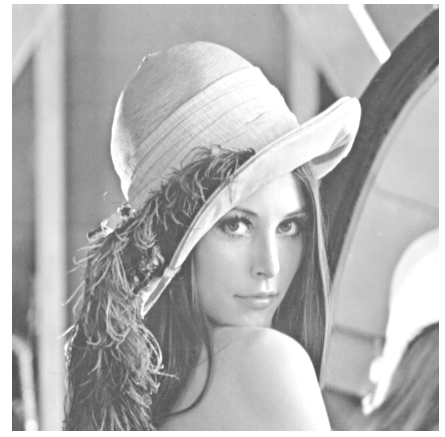

In [70]:
#处理图片
from PIL import Image
img = Image.open('./img/lena.png') #加载图片
display(img)
imgarr = np.array(img)
print('shape:',imgarr.shape)
# imgarr += 50   提升图片像素的灰度值
# imgarr[imgarr >= 205] = 255
# imgarr[imgarr < 205] += 50
imgarr = np.where(imgarr >= 205,255,imgarr + 50)
arr43 = Image.fromarray(imgarr)
display(arr43)

- **NumPy = 数值计算引擎**  
  ✓ 核心优势：原始计算速度  
  ✓ 适用场景：数学/物理/图像等数值密集型任务

- **Pandas = 数据处理工具箱**  
  ✓ 核心优势：数据操作表达能力  
  ✓ 适用场景：商业分析/金融/统计等结构化数据处理

> **最佳实践**：用Pandas加载和整理数据 → 转换为NumPy数组进行高性能计算 → 结果转回Pandas进行可视化/存储。两者共同构成Python数据科学生态的基础支柱。